<a href="https://colab.research.google.com/github/Saisaritha/Advanced-Coding/blob/master/ObjectDetectionUsingCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from keras.utils import np_utils
import matplotlib.pyplot as plt
import numpy as np

OBJECT DETECTION USING NLP

In [ ]:
#LOADING AND SPLITTING DATA

In [ ]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.cifar10.load_data()

In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
x_test.shape

(10000, 32, 32, 3)

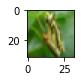

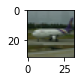

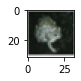

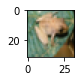

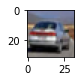

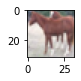

In [ ]:
for i in range(232,238):
  plt.subplot(220+i+1)
  img=x_train[i]
  plt.imshow(img)
  plt.show()


In [ ]:
#PREPROCESS THE DATA

In [ ]:
x_train=x_train.reshape(x_train.shape[0],32,32,3)
x_test=x_test.reshape(x_test.shape[0],32,32,3)
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train/=255
x_test/=255
n_classes=10

print('shape beforeone-hot encoding',y_train.shape)
y_train=np_utils.to_categorical(y_train,n_classes)
y_test=np_utils.to_categorical(y_test,n_classes)
print('shape after one-hot encoding',y_train.shape)

shape beforeone-hot encoding (50000, 1)
shape after one-hot encoding (50000, 10)


BUILDING THE MODEL

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPool2D

In [ ]:
model=Sequential()
#Convolution Layers
model.add(Conv2D(50,kernel_size=(3,3),strides=(1,1),padding='same',activation='relu',input_shape=(32,32,3)))

In [ ]:
model.add(Conv2D(75,kernel_size=(3,3),strides=(1,1),padding='same',activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

In [ ]:
model.add(Conv2D(125,kernel_size=(3,3),strides=(1,1),padding='same',activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

In [ ]:
model.add(Flatten())

In [ ]:
#Hidden Layers
model.add(Dense(500,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250,activation='relu'))
model.add(Dropout(0.3))

In [ ]:
#Output Layer
model.add(Dense(10,activation='softmax'))

In [ ]:
#compiling
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [ ]:
#Fitting the model
model.fit(x_train,y_train,batch_size=128,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
391/391 [==============================] - 548s 1s/step - loss: 1.4362 - accuracy: 0.4784 - val_loss: 1.0985 - val_accuracy: 0.6119
Epoch 2/10
391/391 [==============================] - 554s 1s/step - loss: 1.0434 - accuracy: 0.6318 - val_loss: 0.8902 - val_accuracy: 0.6933
Epoch 3/10
391/391 [==============================] - 556s 1s/step - loss: 0.8897 - accuracy: 0.6889 - val_loss: 0.8037 - val_accuracy: 0.7234
Epoch 4/10
391/391 [==============================] - 552s 1s/step - loss: 0.7853 - accuracy: 0.7257 - val_loss: 0.7515 - val_accuracy: 0.7414
Epoch 5/10
391/391 [==============================] - 550s 1s/step - loss: 0.7125 - accuracy: 0.7505 - val_loss: 0.7139 - val_accuracy: 0.7548
Epoch 6/10
391/391 [==============================] - 551s 1s/step - loss: 0.6441 - accuracy: 0.7758 - val_loss: 0.6656 - val_accuracy: 0.7720
Epoch 7/10
391/391 [==============================] - 549s 1s/step - loss: 0.5866 - accuracy: 0.7927 - val_loss: 0.6850 - val_accuracy: 0.7668

In [ ]:
classes=range(10)
names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [ ]:
#zip the names and classes to amke a dict of class_labels
class_lables=dict(zip(classes,names))

In [ ]:
#generate batchof 9 images to predict
batch=x_test[100:109]
labels=np.argmax(y_test[100:109],axis=1)

In [ ]:
#make prediction
pred=model.predict(batch,verbose=1)

1/1 [==============================] - 0s 161ms/step


In [ ]:
print(pred)

[[1.30550479e-05 1.55366206e-06 3.22714588e-03 7.67286681e-03
  6.52203023e-01 9.22080651e-02 1.55471906e-04 2.44491130e-01
  1.74455599e-05 1.02588465e-05]
 [3.47403111e-04 9.47847948e-05 1.42796695e-01 1.12026058e-01
  1.49385948e-02 6.37936771e-01 3.95410992e-02 5.02024293e-02
  3.64084728e-04 1.75217260e-03]
 [1.74918841e-05 2.13333587e-05 8.06172937e-03 4.97536967e-03
  4.24739788e-04 9.22002422e-04 9.85459208e-01 4.76292007e-05
  2.28884019e-05 4.76200257e-05]
 [4.30931686e-05 3.42921558e-05 6.76260504e-04 7.64082611e-01
  6.24133274e-03 1.10245422e-02 2.17510298e-01 1.63485092e-05
  2.78851185e-05 3.43348423e-04]
 [1.47889318e-06 9.99234080e-01 7.65624231e-11 6.93504212e-11
  8.17156130e-13 7.57512629e-12 5.80426679e-11 3.69048412e-12
  9.95658775e-06 7.54498411e-04]
 [2.79424228e-07 9.98749018e-01 3.60812380e-10 3.18660709e-10
  1.27498229e-12 1.42824832e-11 5.63726399e-10 1.38322817e-12
  6.67912536e-06 1.24403578e-03]
 [1.20290667e-02 1.99189060e-03 1.21403560e-01 2.98031330e

In [ ]:
for i in pred:
  print(np.sum(i))

1.0000001
1.0000001
1.0
1.0
1.0
1.0
0.9999998
0.99999994
1.0


In [ ]:
class_res=np.argmax(pred,axis=1)
print(class_res)

[4 5 6 3 1 1 5 6 8]


FINAL OBJECT DETECTION

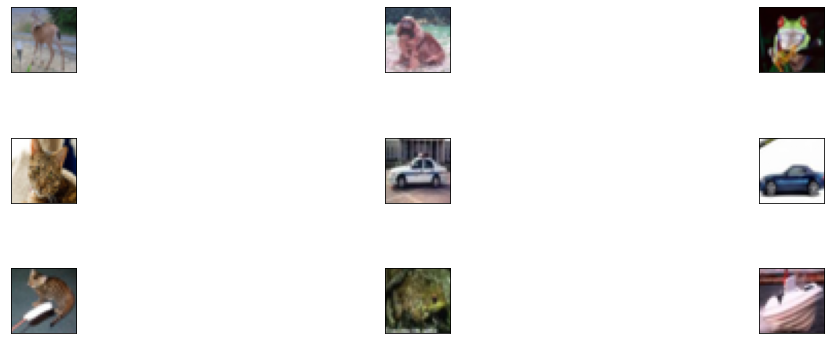

In [ ]:
fig,axs=plt.subplots(3,3,figsize=(19,6))
fig.subplots_adjust(hspace=1)
axs=axs.flatten()
for i,img in enumerate(batch):
  for key,val in class_lables.items():
    if class_res[i]==key:
      title='pred:{}\n Actual: {}'.format(class_lables[key],class_lables[labels[i]])
#      axs[i].set_title(title)
      axs[i].axes.get_xaxis().set_visible(False)
      axs[i].axes.get_yaxis().set_visible(False)
  axs[i].imshow(img)
plt.show()